# Import Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer 
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data_raw.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 586 entries, company_id to interest_coverage_q3_2023
dtypes: float64(585), object(1)
memory usage: 457.9+ KB


In [9]:
df_comp=df[df.columns[0]]
share_outstanding=df[df.columns[47:65]]
eps=df[df.columns[111:129]]
pe_ratio=df[df.columns[169:193]]
price_to_sales=df[df.columns[233:257]]
ebitda= df[df.columns[297:321]]
return_on_assets=df[df.columns[367:385]]
return_on_equity=df[df.columns[431:449]]
return_on_capital_employed=df[df.columns[495:513]]
interest_coverage=df[df.columns[559:577]]



In [11]:
sum_share_outstanding = share_outstanding.sum(axis=1)
sum_eps = eps.sum(axis=1)
sum_pe_ratio = pe_ratio.sum(axis=1)
sum_price_to_sales = price_to_sales.sum(axis=1)
sum_ebitda = ebitda.sum(axis=1)
sum_return_on_assets = return_on_assets.sum(axis=1)
sum_return_on_equity = return_on_equity.sum(axis=1)
sum_return_on_capital_employed = return_on_capital_employed.sum(axis=1)
sum_interest_coverage = interest_coverage.sum(axis=1)

In [12]:
df2 = pd.DataFrame({
    'company':df_comp,
    'sum_share_outstanding': sum_share_outstanding,
    'sum_eps': sum_eps,
    'sum_pe_ratio': sum_pe_ratio,
    'sum_price_to_sales': sum_price_to_sales,
    'sum_ebitda': sum_ebitda,
    'sum_return_on_assets': sum_return_on_assets,
    'sum_return_on_equity': sum_return_on_equity,
    'sum_return_on_capital_employed': sum_return_on_capital_employed,
    'sum_interest_coverage': sum_interest_coverage
})

In [22]:
df2

,company,sum_share_outstanding,sum_eps,sum_pe_ratio,sum_price_to_sales,sum_ebitda,sum_return_on_assets,sum_return_on_equity,sum_return_on_capital_employed,sum_interest_coverage
0,0,3.456000e+10,2744.05,6255.31,111.03,1.556510e+13,0.1976,0.2855,0.4042,184.32
1,1,3.087000e+11,207.45,3128.46,309.05,6.348580e+12,0.6630,0.8929,0.9998,2578.24
2,2,7.863000e+10,309.39,6706.32,36.41,7.291340e+12,0.0554,0.2864,0.6019,54.76
3,3,5.758200e+11,2129.16,258.91,101.52,1.035105e+14,0.3317,0.5618,0.5525,187.17
4,4,4.005600e+11,-131.43,7673.86,947.30,7.340800e+11,-0.1417,-1.1193,-0.0508,0.00
...,...,...,...,...,...,...,...,...,...,...
95,95,1.614600e+11,320.79,9229.02,63.78,1.204446e+13,0.0840,0.3526,0.4316,80.40
96,96,1.143500e+11,210.09,5252.57,114.56,3.497240e+12,0.2681,0.4856,0.9473,52.45
97,97,4.744800e+11,-171.23,197.48,200.05,4.302950e+12,-0.6185,4.0204,0.2098,111.31
98,98,3.459600e+11,-571.40,551.31,80.43,1.461569e+13,-0.0322,-0.4352,0.2721,29.76


In [13]:
from sklearn.preprocessing import LabelEncoder

# Misalkan df adalah DataFrame Anda

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'company_id'
df2['company'] = label_encoder.fit_transform(df2['company'])


In [14]:
scaler = StandardScaler()
df3=scaler.fit_transform(df2)
df3

array([[-1.71481604e+00, -7.70502205e-01,  3.95017012e-01,
         6.05569243e-01, -1.74230650e-01, -2.79165447e-01,
        -1.02525051e-01, -2.55814670e-01, -2.82691526e-01,
        -1.62212668e-01],
       [-1.68017329e+00, -1.95239979e-01, -3.21662494e-01,
         1.04269404e-01, -7.13493137e-02, -4.72562251e-01,
         1.40897896e+00,  1.63225660e-01,  6.22436838e-01,
         4.49285992e-02],
       [-1.64553055e+00, -6.78024616e-01, -2.92860827e-01,
         6.77875634e-01, -2.12999489e-01, -4.52779646e-01,
        -5.64355455e-01, -2.55193767e-01,  1.77515185e-02,
        -1.73423244e-01],
       [-1.61088780e+00,  3.65291304e-01,  2.21288769e-01,
        -3.55779831e-01, -1.79171573e-01,  1.56625636e+00,
         3.32998559e-01, -6.51975425e-02, -5.73212504e-02,
        -1.61966063e-01],
       [-1.57624505e+00, -2.47865960e-03, -4.17408119e-01,
         8.32992652e-01,  2.60253621e-01, -5.90375303e-01,
        -1.20448747e+00, -1.22497479e+00, -9.74151240e-01,
        -1.

In [15]:
# Melakukan pca
pca = PCA()
pca.fit(df3)

PCA()

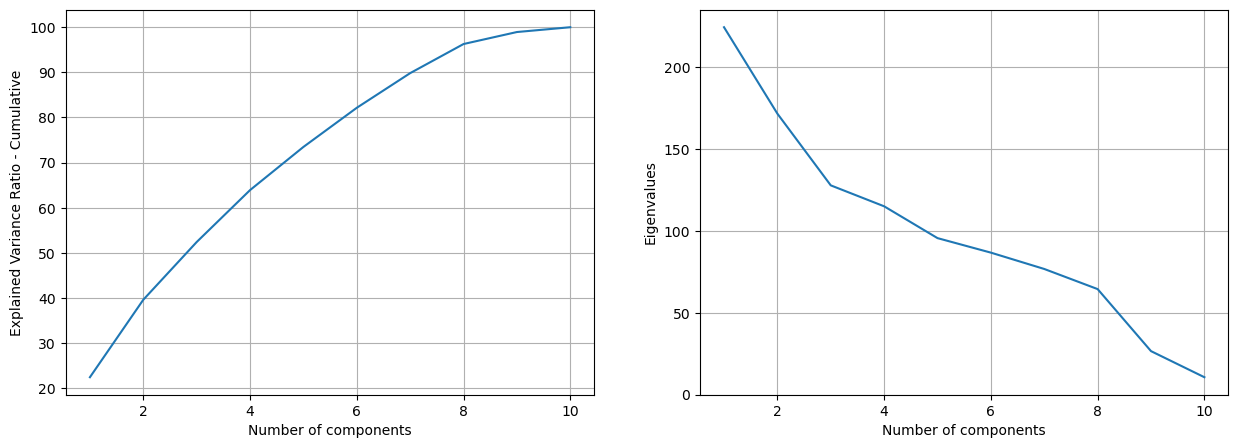

In [16]:
# Plot the cumulative explained variance ratio and eigenvalues to determine the number of components to retain
plt.figure(figsize=(15, 5))

# Plot the Cumulative Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cumulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.singular_values_) + 1), pca.singular_values_ ** 2)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.show()

In [17]:
# Determine the number of features to retain 95% of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print("Number of features to retain 95% of information:", num_features)

Number of features to retain 95% of information: 8


In [18]:
# Retrain PCA with the selected number of components and transform your data
pca = PCA(n_components=num_features)
pca.fit(df3)
df_pca = pca.transform(df3)

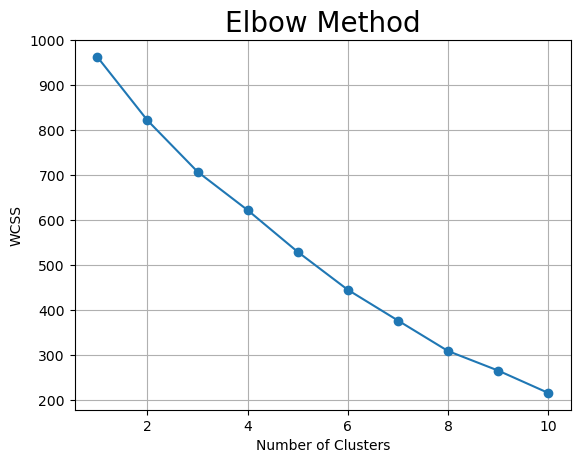

In [19]:

# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 10
for i in range(1, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_pca)
    wcss.append(km.inertia_)

plt.plot(range(1, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 3 The average silhouette_score is : 0.4574853344268185
For n_clusters = 4 The average silhouette_score is : 0.3542757954104292
For n_clusters = 5 The average silhouette_score is : 0.4424807738748481
For n_clusters = 6 The average silhouette_score is : 0.44900212795549216
For n_clusters = 7 The average silhouette_score is : 0.48235221815412443
For n_clusters = 8 The average silhouette_score is : 0.21922264637111535
For n_clusters = 9 The average silhouette_score is : 0.2477096025712025


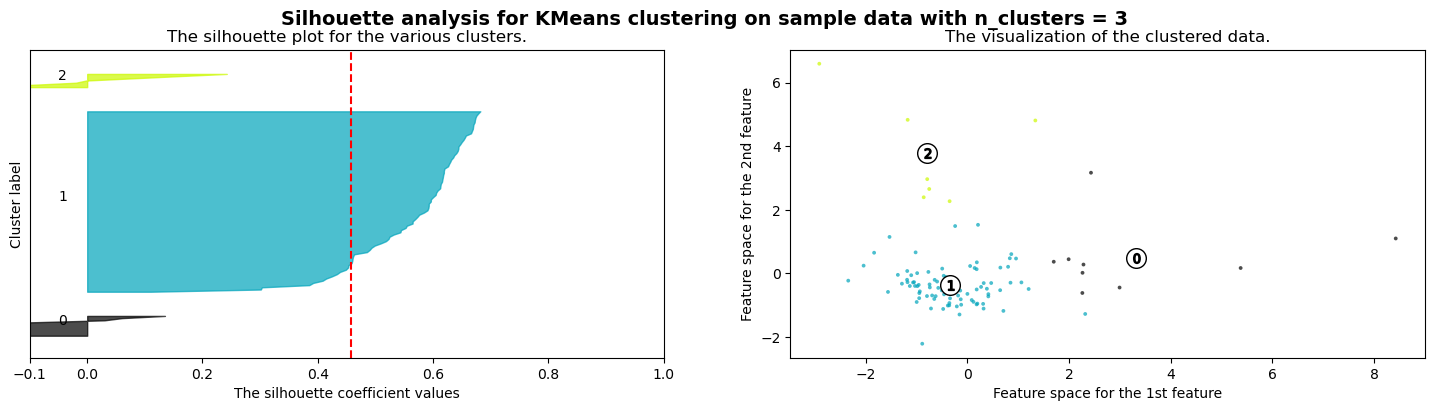

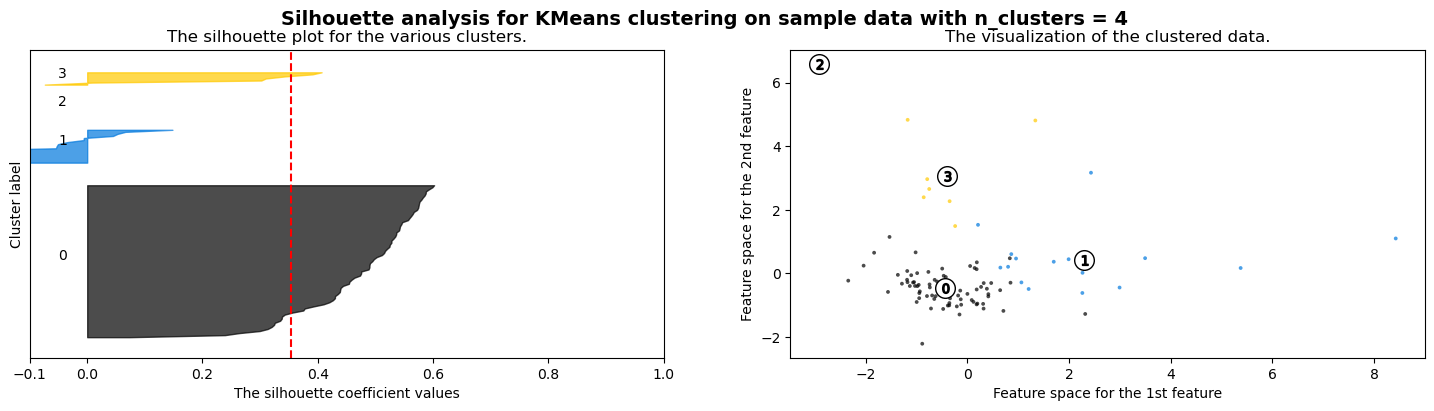

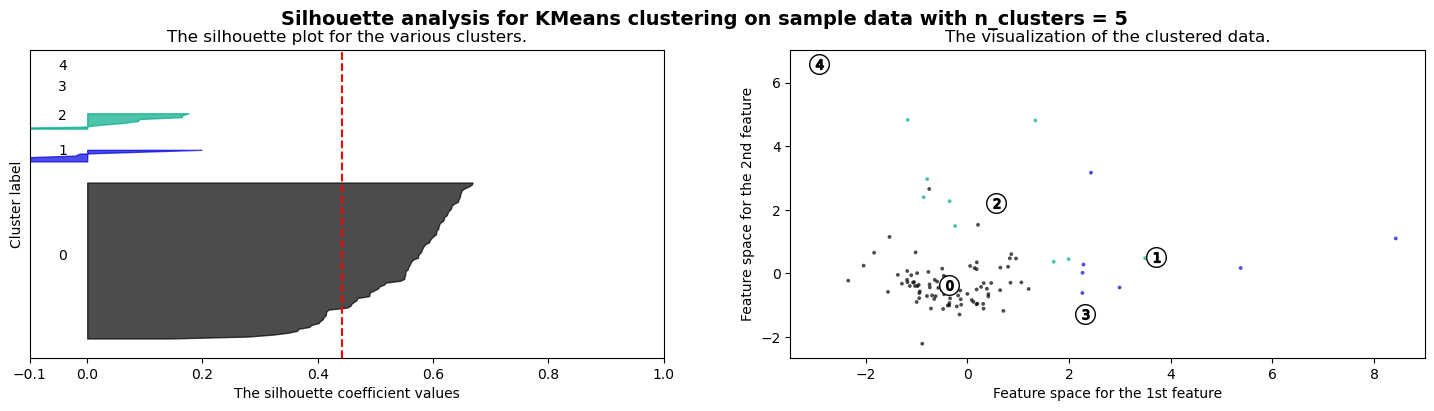

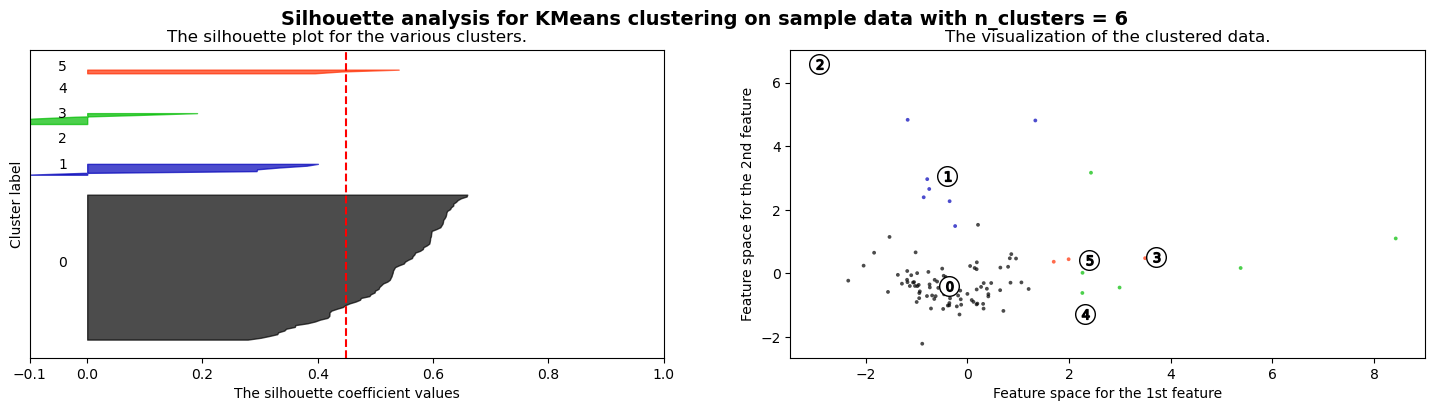

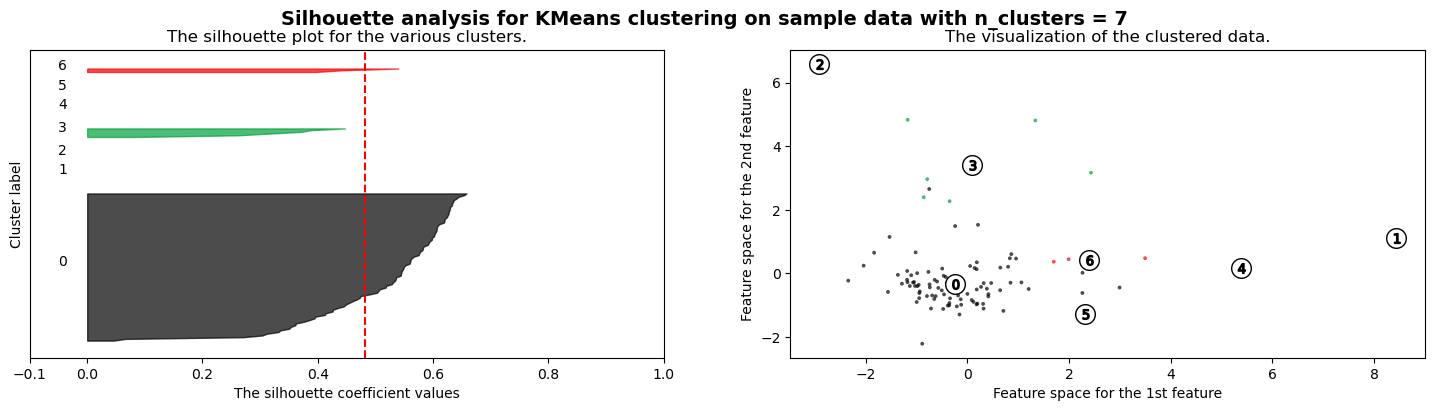

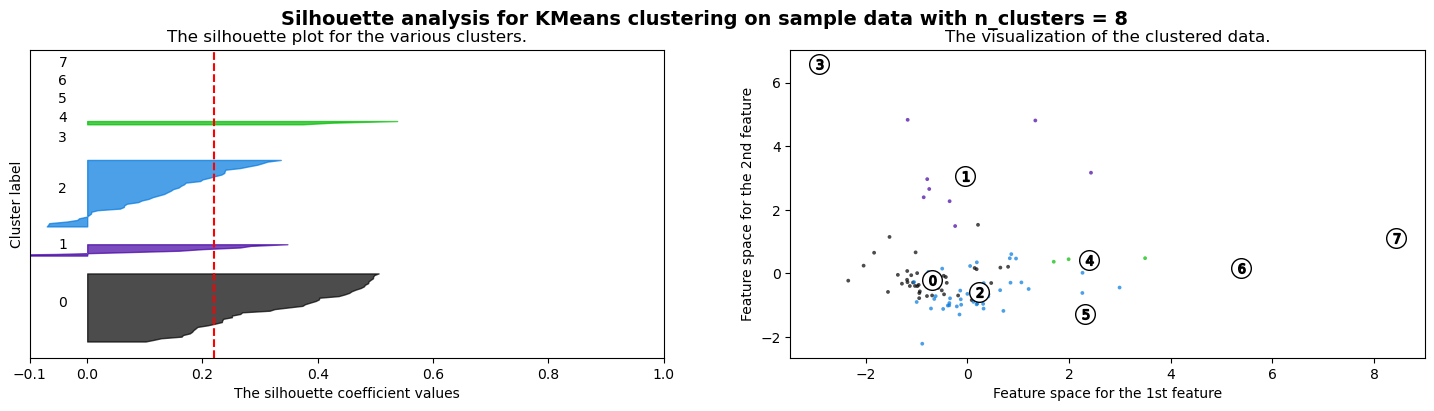

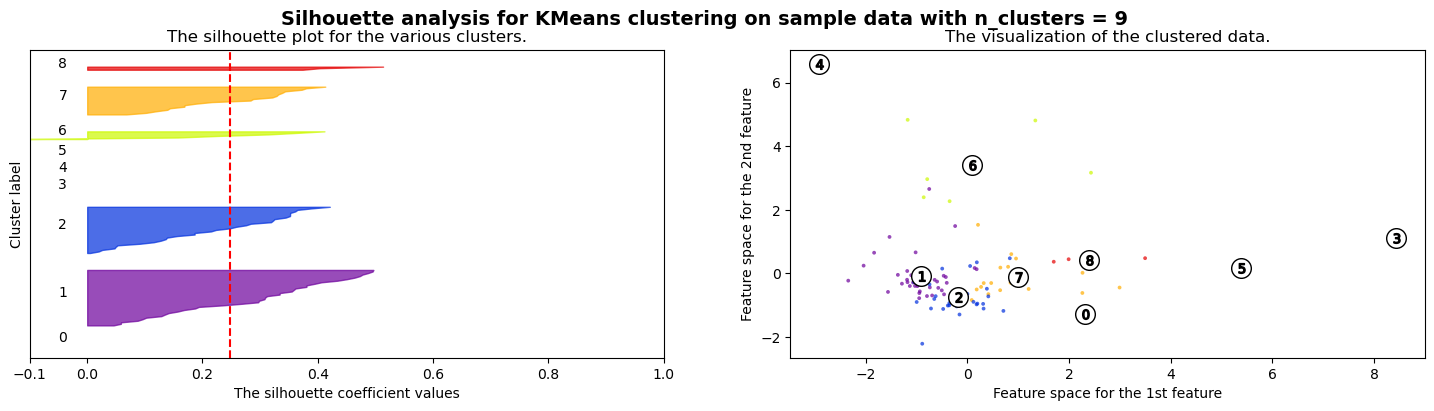

In [21]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(3, max_cluster), df_pca, random_state)